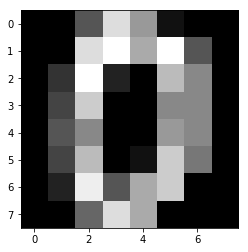

In [4]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap="gray")
plt.show()


In [11]:

print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

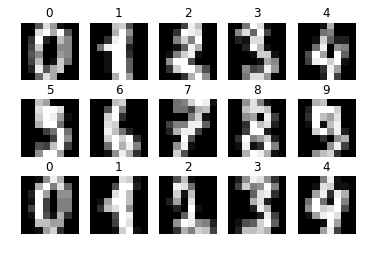

In [5]:
import cv2
import matplotlib.pyplot as plt

from sklearn import datasets
digits = datasets.load_digits()

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

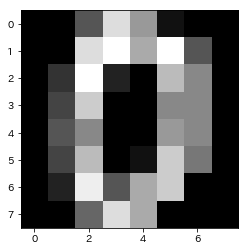

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [6]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()

print(d0)

In [14]:
d = digits.images
d = d.reshape((-1, 64))
print(len(d[0]))
print(len(d))
print(d[0])
#１行64個 即ち画像一枚
#合計1797枚ある

64
1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# データを読み込む
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 二次元配列を一次元配列に変換
# データを学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# データを学習
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 予測して精度を確認する
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9533333333333334


/Users/katayamayuuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
# 学習済みデータを保存
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

/Users/katayamayuuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['digits.pkl']

In [23]:
import cv2
from sklearn.externals import joblib

def predict_digit(filename):
    # 学習済みデータを読み込む
    clf = joblib.load("digits.pkl")
    
    # 自分で用意した手書きの画像ファイルを読み込む
    my_img = cv2.imread(filename)
    
    # 画像データを学習済みデータに合わせる
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    
    #my_img = cv2.bitwise_not(my_img) ←これでも反転d
    my_img = 15 - my_img // 16 # 白黒反転する
    # 二次元を一次元に変換
    my_img = my_img.reshape((-1, 64))
    # データ予測する
    res = clf.predict(my_img)
    return res[0]

# 画像ファイルを指定して実行
n = predict_digit("my2.png")
print("my2.png = " + str(n))
n = predict_digit("my4.png")
print("my4.png = " + str(n))
n = predict_digit("my9.png") # --- 判定できない
print("my9.png = " + str(n))



my2.png = 2
my4.png = 4
